# **K-means clustering for masking**

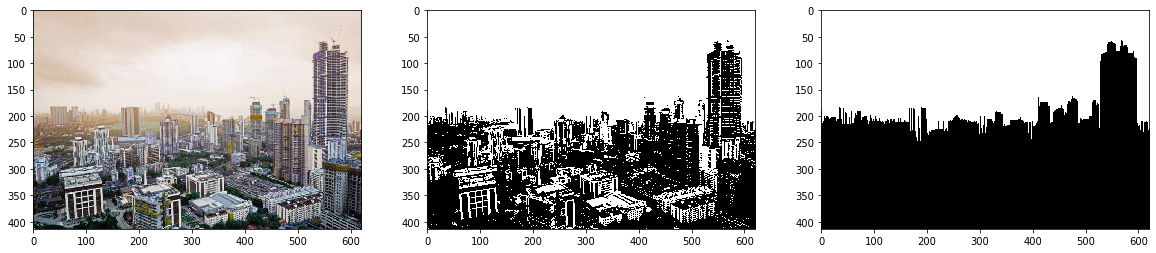

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
from scipy.misc import face
import sys
import cv2
sys.setrecursionlimit(30000)
num_clusters = 8
import time
start_time = time.time()
def rgb2grayscale(im):        
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)        
        return im
input_file = 'image_input.jpg'    #change your file name here
im = cv2.imread(input_file)
cv2.imwrite('output'+str('_out.png'),cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) ) 
h,w,c = im.shape
img  = rgb2grayscale(np.array(im))
width, height = img.shape
img_ = img.reshape(-1,1)
kmeans = KMeans(n_clusters=2).fit(img_)
values = kmeans.cluster_centers_.squeeze()
labels = kmeans.labels_
x=list(values).index(max(values))
img_compressed = np.choose(labels, values)
img_compressed.shape = img.shape
labels_reshaped = labels.reshape(width, height)
f, axarr = plt.subplots(1,3,figsize=(20, 9))
axarr[0].imshow(im,cmap='gray')
axarr[1].imshow(labels_reshaped,cmap='gray')
sub_clusters = np.zeros((width,height), dtype=np.uint32)
cnt=1
for j in range(height):
    for i in range(width):
        sub_clusters[i,j]=cnt
        cnt +=1
sub_clusters.shape
visited =  np.zeros((width, height), dtype=bool)
row=labels_reshaped.shape[0]
col=labels_reshaped.shape[1]
lowest_pixel=[]
for i in range(col):
    flag=0
    for j in range(row):
        if flag==0:
            if labels_reshaped[j][i]==x:
                labels_reshaped[j][i]=255
            else:
                lowest_pixel.append(j)                
                labels_reshaped[j][i]=0
                flag=1
        else:
            labels_reshaped[j][i]=0
#imgplot = plt.imshow(labels_reshaped,cmap='gray')
axarr[2].imshow(labels_reshaped,cmap='gray')
plt.show()
#cv2.imwrite(input_file[:-4]+str('_out.png'), labels_reshaped) 
#print("--- %s seconds ---" % (time.time() - start_time))


## **Building a Sobel Gradient Layout**

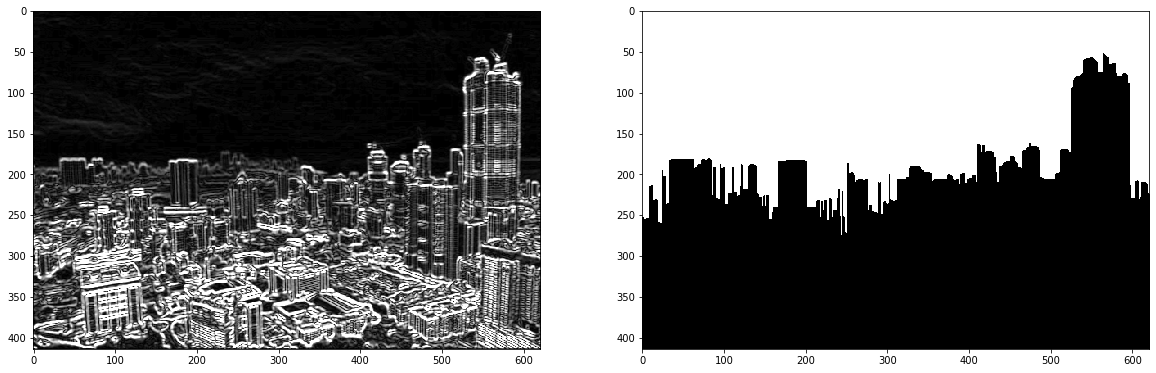

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
from scipy.misc import face
import sys
import cv2
import PIL
#from google.colab import files
#uploaded = files.upload()
import time
start_time = time.time()
input_file = 'image_input.jpg'
img= cv2.imread(input_file)
h,w,c = img.shape

while (h>400 or w > 400):
    im = cv2.resize(img, dsize=(w//2, h//2), interpolation=cv2.INTER_CUBIC)
    h,w,c = im.shape
import cv2 as cv

    
src = img
# Check if image is loaded fine


scale = 1
delta = 0   
ddepth = cv.CV_16S
    
src = cv.GaussianBlur(src, (5, 5), 0)
    
    
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
    
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
    
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 1.5, 0)
    
#cv.imwrite('sobel.jpg', grad)  
f, axarr = plt.subplots(1,2,figsize=(20, 9))
axarr[0].imshow(grad,cmap='gray')



#cv.waitKey(0)
#print(grad.shape)
H=grad.shape[0]
W=grad.shape[1]
#print(H)
def objective_function(b):
    sky=[]
    gnd=[]
    if(sum(b)==(H-1)*(W)):
        return 0        
    for i in range(W):
        for j in range(0,b[i]+1):
            sky.append(img[j,i])
        for j in range(b[i]+1,H):
            gnd.append(img[j,i])    

    sky = np.transpose(sky)
    gnd = np.transpose(gnd)
    #print(sky)
    #print(gnd)
    co_s = np.cov(sky)
    co_g = np.cov(gnd)
    #print(co_g)
    co_sD = np.linalg.det(co_s)
    co_gD = np.linalg.det(co_g)
    eig_s, _ = np.linalg.eig(co_s)
    eig_g, _ = np.linalg.eig(co_g)
    J = 1/(2*co_sD + co_gD + (2*eig_s[0]) + (eig_g[0]))
    return J    
def calculate_border(grad,t):
    
    b = [None] * W
    
    for x in range(W):
        b[x]=H-1
        for y in range(H):
            if(grad[y][x]>t):
                b[x]=y
                break
    return b
                
thresh_min=40
thresh_max=175
search_step=4
n=int((thresh_max-thresh_min)/search_step + 1)
j_n_max=0
for k in range(1,n+1):
    #print(k)
    t=thresh_min+((thresh_max-thresh_min)/n-1)*(k-1)
    b_temp=calculate_border(grad,t)   
    j_n_temp=objective_function(b_temp)
    if j_n_temp>j_n_max:
        j_n_max=j_n_temp
        b_opt=b_temp
#print(b_opt)     

arr=img
for i in range(W):
        for j in range(0,b_opt[i]+1):
            arr[j][i]=255
        for j in range(b_opt[i]+1,H):
            arr[j][i]=0 
#imgplot = plt.imshow(arr,cmap='gray')
#plt.show()
axarr[1].imshow(arr,cmap='gray')
#cv2.imwrite(input_file[:-4]+str('_out_2.jpg'), arr) 
#print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
latitude=17.495131

## Using camera optics to find the elevation angles to the obstruction

In [ ]:
#moto one power
import math
angles=[]
focal_len=3.84 #mm
sensor_height=5.18
sensor_width=3.89
dist_to_horizon=15000 #mm
for i in range(0,len(lowest_pixel)):
    object_height_pix=width-lowest_pixel[i] #pixels
    object_height_mm=object_height_pix*sensor_height/width #mm
    actual_height=dist_to_horizon*object_height_mm/focal_len
    angles.append(math.degrees(math.atan(actual_height/dist_to_horizon)))




## Lowest Sky Pixels



In [ ]:
print(lowest_pixel) #from the top

[233, 297, 298, 316, 315, 315, 319, 319, 333, 336, 337, 337, 338, 337, 337, 337, 337, 337, 337, 337, 337, 338, 337, 337, 337, 337, 337, 337, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 354, 355, 355, 355, 355, 354, 355, 354, 354, 356, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 371, 371, 371, 371, 371, 371, 359, 312, 305, 306, 306, 306, 306, 306, 306, 306, 307, 307, 307, 307, 307, 306, 301, 301, 301, 299, 298, 298, 298, 298, 298, 298, 295, 295, 294, 294, 294, 294, 292, 292, 291, 291, 291, 291, 290, 250, 236, 233, 287, 287, 287, 286, 285, 285, 284, 284, 284, 284, 282, 282, 281, 281, 281, 280, 279, 336, 335, 335, 336, 336, 336, 336, 336, 336, 336, 336, 336, 370, 369, 369, 370, 391, 391, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 385, 385, 385, 385, 385, 385, 385, 385, 347, 347, 346, 347, 343, 342, 342, 342, 342, 342, 342, 341, 342, 342, 341, 342, 342, 341,

## Angles of elevation

In [ ]:
print(angles)


[41.27449319540184, 36.80742543599706, 36.73307113630886, 35.36986141453145, 35.44683763932399, 35.44683763932399, 35.13804954068938, 35.13804954068938, 34.038647751772196, 33.79926604490083, 33.719173051211406, 33.719173051211406, 33.63893033267367, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.63893033267367, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 33.719173051211406, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.33460510644195, 32.3346051064

# **Solar Panel Calculations**

## The maximum angle at which solar panel must be placed: 

In [ ]:
max_angle=90-max(angles)
print(90-max(angles)) 

39.53859779594405


## The optimum angle to place the solar panel ideally.

In [ ]:

print('Elevation angle: '+str(latitude))
print('If winter: ')
print('Elevation angle: '+str(latitude+15))
print('If summer: ')
print('Elevation angle: '+str(round(latitude-15,5)))

Elevation angle: 17.495131
If winter: 
Elevation angle: 32.495131
If summer: 
Elevation angle: 2.49513


## Checking provision for the panel

In [ ]:
elevation=latitude
if elevation<max_angle and elevation>10:
  print('Panel can be installed')
else:
  print('No provision for panel')


Panel can be installed


#**Declination and Azimuth Angles**

---



In [ ]:
import numpy as np
from pvlib import atmosphere
from pvlib.tools import datetime_to_djd, djd_to_datetime
import datetime
import math
def declination_spencer71(dayofyear):
    day_angle = _calculate_simple_day_angle(dayofyear)
    return (
        0.006918 -
        0.399912 * np.cos(day_angle) + 0.070257 * np.sin(day_angle) -
        0.006758 * np.cos(2. * day_angle) + 0.000907 * np.sin(2. * day_angle) -
        0.002697 * np.cos(3. * day_angle) + 0.00148 * np.sin(3. * day_angle)
    )

def _calculate_simple_day_angle(dayofyear, offset=1):
    return (2. * np.pi / 365.) * (dayofyear - offset)

today = datetime.datetime.now()
day_of_year = (today - datetime.datetime(today.year, 1, 1)).days + 1
#print('Day Of Year'+str(day_of_year))
print('Declination Angle'+str(math.degrees(declination_spencer71(day_of_year))))
import requests
import pandas as pd
import io
headers = {
    'Accept': 'text/csv',
}
API='31c3c59d14c245df8c185f14f9c53663'
url = "https://api.ipgeolocation.io/astronomy?apiKey="+str(API)+"&lat=17.495131&long=78.3929384"
urlData = requests.get(url).content
rawData = pd.read_json(io.StringIO(urlData.decode('utf-8')))
print("Azimuth angle "+str(rawData.sun_azimuth[0]))


Declination Angle-13.292165303316011
Azimuth angle 86.28943763003457


# Finding the height at which the solar panel is set up

In [ ]:
x=np.mean(lowest_pixel)
object_height_pix=width-x #pixels
object_height_mm=object_height_pix*sensor_height/width
actual_height=10000*object_height_mm/focal_len
print('The mean angle of obstruction')
print(math.degrees(math.atan(actual_height/10000)))
print('Height shift needed: '+str(((actual_height-10000*math.tan(math.radians(latitude)))/1000)*3.28084))

The mean angle of obstruction
33.076041017628654
Height shift needed: 11.026599138685715


# Extracting solar energy potential from coordinates

In [ ]:
import requests
import pandas as pd
import io
url = "https://api.forecast.solar/estimate/watthours/day/17.495131/78.3929384/13/73/3"
urlData = requests.get(url).content



## Energy generated in Watts per day using 3kWh panel at a particular location.

In [ ]:
rawData = pd.read_json(io.StringIO(urlData.decode('utf-8')))
print(rawData.result[1])


2211.0


### Standard solar panel capacity used for residential purposes are of **3kW**.
### Average household use per month:  **100kWh** 

In [ ]:
per_unit_charge=8.00 #rupees
avg_cost_per_month=8*100


800


### **No. Of Panels Required**

In [ ]:
import math
required_power_per_day=int(input())
print('Capacity(kWh)   No. of solar panels')
for i in range(5,0,-1):
  #print('No. of solar panels required: '+str(math.ceil(required_power_per_day/i)) +' with '+str(i)+' kWh capacity each.')
  print('   '+str(i)+'\t\t\t'+str(math.ceil(required_power_per_day/i)))

4
Capacity(kWh)   No. of solar panels
   5			1
   4			1
   3			2
   2			2
   1			4


## Energy required for various electrical appliances

In [ ]:
import pandas as pd
data=pd.read_csv('appliances.csv')
data=data[['Appliance','Watts']]
data.head(5)

,Appliance,Watts
0,Blender,500
1,Can Opener,150
2,Coffee Machine,1000
3,Dishwasher,1200-1500
4,Espresso Machine,800


# Energy required for 4 fans,4 tubelights,1 fridge,1 geyser,1 TV,1 Water Heater

In [ ]:
fan=4*5*int(data.Watts[2])
light=4*60*6
fridge=1*1411
geyser=1*int(data.Watts[23])*1
TV=1*150*2.5
print("Fans:  "+str(fan))
print("Light:  "+str(light))
print("Fridge:  "+str(fridge))
print("Geyser:  "+str(geyser))
print("TV:  "+str(TV))
sums=fan+light+fridge+geyser+TV
print('Total energy consumption per day in Kilo-Watts: '+str(sums/1000))

For 4 fans,4 tubelights,1 fridge,1 geyser,1 TV,1 Water Heater 
Fans:  20000
Light:  1440
Fridge:  1411
Geyser:  4500
TV:  375.0
Total energy consumption per day in Kilo-Watts: 27.726


# **Usage of solar in transport sector**

/usr/local/lib/python3.6/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


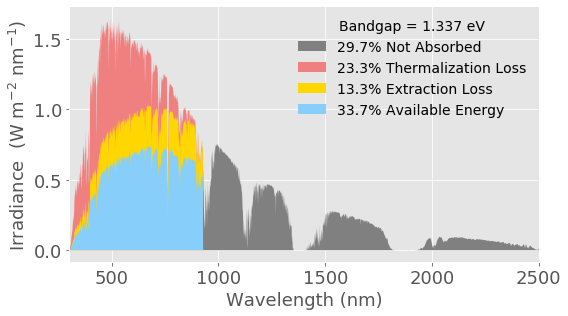

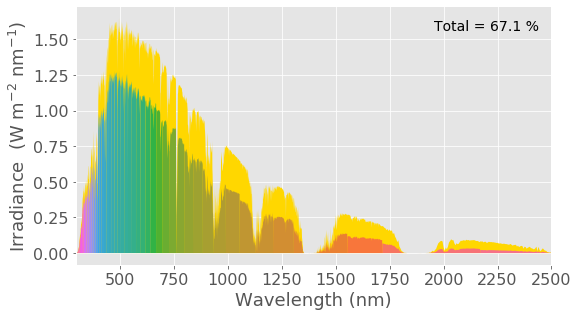

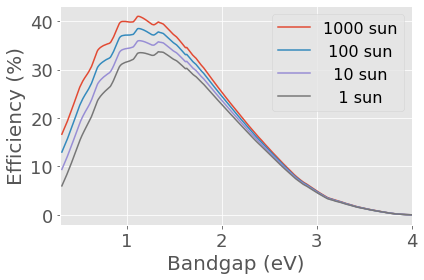

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
import matplotlib.cm as pltcm
from scipy.integrate import cumtrapz
try:  
    import seaborn.apionly as sns
    with_sns = True
except:  
    with_sns = False
plt.ion()
plt.style.use('ggplot')


k = 1.38064852e-23  # m^2 kg s^-2 K^-1, Boltzmi constant
h = 6.62607004e-34   # m^2 kg s^-1    , planck constant
c = 2.99792458e8     # m s^-1         , speed of light
eV = 1.6021766208e-19  # joule        , eV to joule
q = 1.6021766208e-19  # C             , elemental charge

ref_solar = pd.read_csv("ASTMG173.csv", header=1) 
WL, solar_per_nm = ref_solar.iloc[:, 0], ref_solar.iloc[:, 2]
E = 1240.0 / WL  
solar_per_E = solar_per_nm * (eV/1e-9) * h * c / (eV*E)**2

Es = np.arange(0.32, 4.401, 0.002)
AM15 = np.interp(Es, E[::-1], solar_per_E[::-1])  # W m^-2 eV^-1
AM15flux = AM15 / (Es*eV)  # number of photon m^-2 eV^-1 s^-1


class SQlim(object):
    def __init__(self, T=300, EQE_EL=1.0, intensity=1.0):
        try:
            T, EQE_EL, intensity = float(T), float(EQE_EL), float(intensity)
        except:
            raise ValueError("Invalid input for T, EQE_EL, or intensity")

        if T <= 0 or EQE_EL > 1.0 or EQE_EL <= 0:
            raise ValueError("Both T and EQE_EL must be greater than 0 and " +
                             "EQE_EL cannot be greater than 1.0")
        self.T = T
        self.EQE_EL = EQE_EL
        self.intensity = intensity
        self.Es = Es  
        self.calculate()
        self.WLs = np.arange(280, 4001, 1.0)
        self.AM15nm = np.interp(self.WLs, WL, solar_per_nm)

    def __repr__(self):
        s = "<SQlim:"
        conditions = []
        if self.T != 300.0:
            conditions.append("T={:.0f}K".format(self.T))
        if self.intensity != 1.0:
            conditions.append("{:.4g}-Sun".format(self.intensity))
        if self.EQE_EL != 1.0:
            conditions.append("EQE_EL={:.2E}".format(self.EQE_EL))

        if conditions:
            return s + " [" + ", ".join(conditions) + "]" + ">"
        return s + " [standard]>"

    def calculate(self):
        self.J0 = self.__cal_E_J0() 
        self.Jsc = self.__cal_E_Jsc()
        self.Voc = self.__cal_E_Voc()
        self.PCE = self.__cal_E_PCE()
        self.FF = self.PCE / (self.Voc*self.Jsc) * 100.0 * self.intensity
        self.paras = {"Voc": self.Voc, "Jsc": self.Jsc, "J0": self.J0,
                      "FF": self.FF, "PCE": self.PCE}
        return None

    def __cal_E_Jsc(self):
        fluxcumm = cumtrapz(AM15flux[::-1], self.Es[::-1], initial=0)
        fluxaboveE = fluxcumm[::-1] * -1 * self.intensity
        Jsc = fluxaboveE * q * 0.1  
        return Jsc

    def __cal_E_J0(self):
        phi = 2 * np.pi * (((self.Es*eV)**2) * eV / ((h**3) * (c**2)) / (
                           np.exp(self.Es*eV / (k*self.T)) - 1))

        fluxcumm = cumtrapz(phi[::-1], self.Es[::-1], initial=0)
        fluxaboveE = fluxcumm[::-1] * -1
        J0 = fluxaboveE * q * 0.1 / self.EQE_EL 
        J0[-1] = np.nan  
        return J0

    def __cal_E_Voc(self):
        return (k*self.T/q) * np.log((self.Jsc/self.J0) + 1)

    def __cal_E_PCE(self):
        PCE = []
        for i, E in enumerate(self.Es):
            V = np.arange(0, E, 0.001)  
            J = -1 * self.Jsc[i] + self.J0[i] * (
                np.exp(q*V / (k*self.T)) - 1)
            PCE.append(-1 * np.min(J*V) / self.intensity)
        return PCE

    def simulate_JV(self, Eg, plot_dark=False, Vstep=0.001,
                    plot=True, Vmin=-0.5):
        if not self.Es[0] <= Eg <= self.Es[-1]:
            print("invalid bandgap \nvalid range: 0.32 to 4.4")
            return
        V = np.arange(Vmin, Eg, Vstep)
        paras = self.get_paras(Eg, toPrint=False)
        J0, Jsc = paras["J0"], paras["Jsc"]

        J = -1.0 * Jsc + J0 * (np.exp(q*V / (k*self.T)) - 1)
        if plot_dark:
            Jdark = J + Jsc
        mask = (J <= 200)
        if plot:
            title = "Theoretical J-V for Eg = {:.3f} eV".format(Eg)
            plt.plot(V[mask], J[mask], 'r')
            plt.plot([-1, Eg], [0, 0], 'k')
            plt.plot([0, 0], [-2 * Jsc, 200], 'k')
            if plot_dark:
                plt.plot(V[mask], Jdark[mask], 'b')
            plt.ylim(-1.5 * Jsc, min(40, 1.5 * Jsc))
            plt.xlim(-0.25, Eg)
            plt.xlabel("Voltage (V)", fontsize=16)
            plt.ylabel("Current density (mA/$\mathregular{cm^2}$)",
                       fontsize=16)
            plt.tick_params(labelsize=16)
            plt.title(title)
            plt.tight_layout()

        return np.vstack([V, J]) 

    def get_paras(self, Eg, toPrint=True):
 
        if not self.Es[0] <= Eg <= self.Es[-1]:
            print("invalid bandgap \nvalid range: 0.32 to 4.4")
            return
        para = {}
        para["Voc"] = np.interp([Eg], self.Es, self.Voc)[0]
        para["Jsc"] = np.interp([Eg], self.Es, self.Jsc)[0]
        para["FF"] = np.interp([Eg], self.Es, self.FF)[0]
        para["PCE"] = np.interp([Eg], self.Es, self.PCE)[0]
        para["J0"] = np.interp([Eg], self.Es, self.J0)[0]

        if toPrint:  
            print
            print("Bandgap: {0:.3f} eV \n".format(Eg))
            print ("J0 = {0:.3g} mA/cm^2".format(para["J0"]))
            print( "Voc = {0:.4g} \t V".format(para["Voc"]))
            print ("Jsc = {0:.4g} \t mA/cm^2".format(para["Jsc"]))
            print( "FF  = {0:.2f} \t %".format(para["FF"]))
            print ("PCE = {0:.3f} \t %".format(para["PCE"]))
            return

        return para
    def plot(self, para="PCE", xlims=(0.32, 4.5)):
 

        if para not in self.paras:
            print( "Invalid input! Valid inputs are:")
            print ('"Voc", "Jsc", "FF", "PCE", and "J0"')
            return
        yunits = {"Voc": "(V)", "Jsc": "(mA/$\mathregular{cm^2}$)",
                  "FF": "(%)", "J0": "(mA/$\mathregular{cm^2}$)",
                  "PCE": "(%)"}
        plt.figure(para)
        ax = plt.gca()
        ax.plot(self.Es, self.paras[para], lw=3)

        if para == "J0":
            ax.set_yscale('log')
        ax.set_ylabel(para + " " + yunits[para], size=20)
        ax.set_xlim(xlims)
        ax.set_xlabel("Bandgap (eV)", size=20)
        ax.tick_params(labelsize=18)
        plt.tight_layout()
        plt.show()

        return
    def E_loss(self, Eg, xmin=300, xmax=2500, savefig=False):
  

        if Eg > 4.2 or Eg < 0.32:
            print ("invalid bandgap \nvalid range: 0.32 to 4.2")
            return None

        xmax = max(xmax, 1240.0 / Eg)

        WLs = self.WLs
        AM15nm = self.AM15nm

        plt.figure(figsize=(8, 4.5))
        ax = plt.gca()
        colors = {'therm': 'lightcoral', 'extract': 'gold',
                  'avail': 'LightSkyBlue', 'trans': 'grey'}

        mask = (1240.0/WLs) >= Eg

        para = SQ.get_paras(Eg, toPrint=False)
        factor = para["Voc"] * para["FF"] / 100.0 / Eg
        extract = AM15nm / (1240.0/WLs) * Eg * mask
        Eavail = extract * factor
        therm = AM15nm * mask

        extractloss = extract - Eavail
        thermloss = therm - extract
        transloss = AM15nm * (1 - mask)

        ax.fill_between(WLs, 0, transloss,
                        linewidth=0, facecolor=colors['trans'])
        ax.fill_between(WLs, 0, therm,
                        linewidth=0, facecolor=colors['therm'])
        ax.fill_between(WLs, 0, extract,
                        linewidth=0, facecolor=colors['extract'])
        ax.fill_between(WLs, 0, Eavail,
                        linewidth=0, facecolor=colors['avail'])

        E_tot = np.sum(AM15nm)
        E_pct = {'trans': np.sum(transloss) / E_tot,
                 'therm': np.sum(thermloss) / E_tot,
                 'extract': np.sum(extractloss) / E_tot,
                 'avail': np.sum(Eavail) / E_tot}

        legendtitle = "Bandgap = {0:.3f} eV".format(Eg)
        legends = [plt.Rectangle((0, 0), 1, 1,
                   facecolor=colors[i], edgecolor=None)
                   for i in ['trans', 'therm', 'extract', 'avail']]

        labels = ["{:.1f}% Not Absorbed".format(100.0 * E_pct['trans']),
                  "{:.1f}% Thermalization Loss".format(100.0 * E_pct['therm']),
                  "{:.1f}% Extraction Loss".format(100.0 * E_pct['extract']),
                  "{:.1f}% Available Energy".format(100.0 * E_pct['avail'])]

        ax.plot([Eg], [0])
        ax.legend(legends, labels, frameon=False, title=legendtitle,
                  fontsize=14, loc="upper right")
        ax.get_legend().get_title().set_fontsize(14)

        ax.set_xlim(xmin, xmax)
        ax.set_ylabel("Irradiance  (W $\mathregular{m^{-2}\ nm^{-1}}$)",
                      size=18)
        ax.set_xlabel("Wavelength (nm)", size=18)
        ax.tick_params(labelsize=18)

        plt.tight_layout()
        if savefig:
            plt.savefig("available_E.pdf", transparent=False)

        losses = pd.DataFrame()
        losses["Wavelength"] = WLs
        losses["Thermalization Loss"] = thermloss
        losses["Extraction Loss"] = extractloss
        losses["Not Absorbed"] = transloss
        losses["Available"] = Eavail

        return losses

    def available_E(self, Egs, E_MPP=True, xmin=300, xmax=2500,
                    savefig=False, legend=True, legend_totE=True):
  
  
        try:  
            numEg = len(Egs)
        except:
            numEg, Egs = 1, [Egs]
        EgMax, Egmin = max(Egs), min(Egs)
        if EgMax > 4.2 or Egmin < 0.32:
            print ("invalid bandgap \nvalid range: 0.32 to 4.2 eV")
            return None
        xmax = max(xmax, 1240.0 / Egmin)
        xmin = min(xmin, 1240.0 / EgMax)
        Egs = sorted(list(Egs) + [4.5])  

        WLs = self.WLs
        AM15nm = np.interp(WLs, WL, solar_per_nm)
        plt.figure(figsize=(8, 4.5))
        ax = plt.gca()
        solarcolor = "gold"
        ax.fill_between(WLs, 0, AM15nm, linewidth=0.0, facecolor=solarcolor)

        factor = 1.0
        E_subcell = pd.DataFrame()
        E_subcell["WL"] = WLs
        E_subcell["Solar"] = AM15nm
        PCEsubcell, tot_E = [], 1000.0

        Jscs = [SQ.get_paras(E, toPrint=False)["Jsc"] for E in Egs[:-1]]
        Jscs.append(0.0)

        if with_sns:
            colors = sns.color_palette("husl", len(Egs))
        else:
            cm = plt.get_cmap('gist_rainbow')  
            cNorm = pltcolors.Normalize(0, 1.2 * (numEg-1))
            scalarMap = pltcm.ScalarMappable(norm=cNorm, cmap=cm)
            colors = [scalarMap.to_rgba(i) for i in xrange(numEg)]

        for n, Eg in enumerate(Egs[:-1]):
            color = colors[n]
            if E_MPP:
                SQ_E = SQlim(intensity=(Jscs[n]-Jscs[n+1]) / Jscs[n],
                             T=self.T, EQE_EL=self.EQE_EL)
                para = SQ_E.get_paras(Eg, toPrint=False)
                factor = para["Voc"] * para["FF"] / 100.0 / Eg
            mask = ((1240.0/WLs) >= Eg) * (Egs[n+1] >= (1240.0/WLs))
            Eavail = factor * AM15nm / (1240.0/WLs) * Eg * mask
            E_subcell["Eg=" + str(round(Eg, 3))] = Eavail
            PCEsubcell.append(100 * np.sum(Eavail) / tot_E)
            ax.fill_between(WLs, 0, Eavail, facecolor=color, linewidth=0.0)
            # ax.fill_between(WLs, 0, Eavail, facecolor=color, linewidth=0.2)

        ax.set_xlim(xmin, xmax)
        ax.set_ylabel("Irradiance  (W $\mathregular{m^{-2}\ nm^{-1}}$)",
                      size=18)
        ax.set_xlabel("Wavelength (nm)", size=18)
        ax.tick_params(labelsize=16)

        if legend:
            legends = [plt.Rectangle((0, 0), 1, 1, facecolor=colors[i],
                       edgecolor=None) for i in range(numEg - 1, -1, -1)]

            if numEg == 1:
                labels = ["Eg={0} eV, PCE={1:.1f}%".format(Egs[0],
                          PCEsubcell[0])]

            else:
                labels = ["Cell {0}, Eg={1:.2f} eV, PCE={2:.1f}%".format(
                          numEg - i, Egs[i], PCEsubcell[i])
                          for i in range(numEg - 1, -1, -1)]

            ax.legend(legends, labels, frameon=False, loc="upper right",
                      fontsize=14)

        if numEg != 1 and legend_totE:
            totE = np.nansum(PCEsubcell) 
            legend_title = "Total = {0:.1f} %".format(totE)
            if not ax.get_legend():
                ax.legend("", "", frameon=False, loc="upper right",
                          title=legend_title, fontsize=14)
            else:
                ax.get_legend().set_title(legend_title)
            ax.get_legend().get_title().set_fontsize(14)
        ax.tick_params(labelsize=16)
        plt.tight_layout()
        if savefig:
            fname = "available_E_tandem"
            for E in Egs[:-1]:
                fname += "_{:.2f}".format(E)  # str(round(Es,2))
            plt.savefig(fname + ".pdf", transparent=True)
        plt.show()

        return E_subcell, PCEsubcell

  
    @classmethod
    def vary_suns(cls, Suns=(1, 10, 100, 1000), xlim=[0.3, 4.0], attr="PCE"):
        plt.figure()
        parameters = {"PCE", "Jsc", "FF", "Voc", "J0"}
        if attr not in parameters:
            print ("Invalid attribute")
            return
        SQs = [SQlim(intensity=sun) for sun in sorted(Suns, reverse=True)]
        for SQ in SQs:
            plt.plot(Es, getattr(SQ, attr),
                     label="{:4G} sun".format(SQ.intensity))
            cls.__helper_plt(xlim, attr)

        plt.show()

        return SQs

    @classmethod
    def __helper_plt(cls, xlim, attr="PCE"):
        ylabel = {"PCE": "Efficiency (%)", "Voc": "Voc (V)", "FF": "FF (%)",
                  "Jsc": "Jsc (mA/$\mathregular{cm^2}$)",
                  "J0": "J0 (mA/$\mathregular{cm^2}$)"}
        plt.xlabel("Bandgap (eV)", size=20)
        plt.ylabel(ylabel[attr], size=20)
        plt.xlim(xlim)
        plt.tick_params(labelsize=18)
        ax = plt.gca()
        ax.legend(loc='upper right', fontsize=16)
        plt.tight_layout()

        return

 
if __name__ == "__main__":
    SQ = SQlim()
    SQ.E_loss(1.337)
    plt.show()
    SQ.available_E(np.linspace(0.496, 4.2, 50), legend=False)
    SQlim.vary_suns(Suns=[1, 10, 100, 1000])